In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import keras
from keras.models import Sequential,load_model
from keras.layers import Conv2D, Dense, Activation, Dropout, BatchNormalization,Flatten,MaxPooling2D
from keras.optimizers import RMSprop,Nadam
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras import backend as K

# Prepare data for training

## Read the csv file for training

In [7]:
#Read data
for num in range(10):
    #raw = np.zeros(shape=(50,1,509,6))
    raw = np.zeros(shape=(50,509,6,1))
    path = "keyboard/"+str(num)+"/*.csv"
    files = glob.glob(path)
    files.sort()
    i = 0
    for File in files:
        raw_data = pd.read_csv(File,index_col=None, header=0)
        #print(raw_data.shape)
        raw_array = np.array(raw_data)  #use it as a array
        raw[i,:,:,0] = raw_array
        i+=1
    print(raw.shape)
    if (num == 0):
        raw_0 = raw
    elif(num == 1):
        raw_1 = raw
    elif(num == 2):
        raw_2 = raw
    elif(num == 3):
        raw_3 = raw
    elif(num == 4):
        raw_4 = raw
    elif(num == 5):
        raw_5 = raw
    elif(num == 6):
        raw_6 = raw
    elif(num == 7):
        raw_7 = raw
    elif(num == 8):
        raw_8 = raw
    elif(num == 9):
        raw_9 = raw
        

(50, 509, 6, 1)
(50, 509, 6, 1)
(50, 509, 6, 1)
(50, 509, 6, 1)
(50, 509, 6, 1)
(50, 509, 6, 1)
(50, 509, 6, 1)
(50, 509, 6, 1)
(50, 509, 6, 1)
(50, 509, 6, 1)


In [8]:
print(raw_6[0][:][:][0])
print(raw_5[0][:][:][0])
#print(raw_4[0][:][:][0])
#print(raw_3[0][:][:][0])
#print(raw_2[0][:][:][0])
#print(raw_1[0][:][:][0])

[[ 6.6586e+03]
 [ 3.0304e+00]
 [ 4.2504e+03]
 [-1.2719e-01]
 [ 1.3712e+04]
 [-8.3698e-01]]
[[ 1.7819e+03]
 [-8.4967e-01]
 [ 9.4164e+02]
 [ 2.4121e+00]
 [ 4.2805e+03]
 [-4.9556e-02]]


# Split the data

In [9]:
#train_9 = np.zeros(shape=(40,1,509,6))
train_9 = np.zeros(shape=(40,509,6,1))
test_9 = np.zeros(shape=(10,509,6,1))
train_8 = np.zeros(shape=(40,509,6,1))
test_8 = np.zeros(shape=(10,509,6,1))
train_7 = np.zeros(shape=(40,509,6,1))
test_7 = np.zeros(shape=(10,509,6,1))
train_6 = np.zeros(shape=(40,509,6,1))
test_6 = np.zeros(shape=(10,509,6,1))
train_5 = np.zeros(shape=(40,509,6,1))
test_5 = np.zeros(shape=(10,509,6,1))
train_4 = np.zeros(shape=(40,509,6,1))
test_4 = np.zeros(shape=(10,509,6,1))
train_3 = np.zeros(shape=(40,509,6,1))
test_3 = np.zeros(shape=(10,509,6,1))
train_2 = np.zeros(shape=(40,509,6,1))
test_2 = np.zeros(shape=(10,509,6,1))
train_1 = np.zeros(shape=(40,509,6,1))
test_1 = np.zeros(shape=(10,509,6,1))
train_0 = np.zeros(shape=(40,509,6,1))
test_0 = np.zeros(shape=(10,509,6,1))
for i in range(40):
    train_9[i] = raw_9[i]
    train_8[i] = raw_8[i]
    train_7[i] = raw_7[i]
    train_6[i] = raw_6[i]
    train_5[i] = raw_5[i]
    train_4[i] = raw_4[i]
    train_3[i] = raw_3[i]
    train_2[i] = raw_2[i]
    train_1[i] = raw_1[i]
    train_0[i] = raw_0[i]
for i in range(10):
    #要去看資料排在後10筆的,對了
    test_9[i] = raw_9[i+40]
    test_8[i] = raw_8[i+40]
    test_7[i] = raw_7[i+40]
    test_6[i] = raw_6[i+40]
    test_5[i] = raw_5[i+40]
    test_4[i] = raw_4[i+40]
    test_3[i] = raw_3[i+40]
    test_2[i] = raw_2[i+40]
    test_1[i] = raw_1[i+40]
    test_0[i] = raw_0[i+40]
#print(train_6[0][0][:][:])
#print(train_5[0][0][:][:])
#print(train_4[0][0][:][:])
#print(test_6[0][0][:][:])
#print(test_5[0][0][:][:])
#print(test_4[0][0][:][:])

# Concate the data

In [10]:
#train = train_6 + train_5 + train_4
#test = test_6 + test_5 + test_4
#利用Ctrl+F檢查有無錯誤, 不對稱的地方
num_class = 9
train_count = 40
test_count = 10
train = np.zeros(shape=(train_count*num_class,509,6,1))
test = np.zeros(shape=(test_count*num_class,509,6,1))
for i in range(train_count*num_class):
    if i < train_count:
        train[i] = train_9[i]
    elif (i >= train_count) and (i < 2*train_count):
        train[i] = train_8[i-train_count]
    elif (i >= 2*train_count) and (i < 3*train_count):
        train[i] = train_7[i-2*train_count]
    elif (i >= 3*train_count) and (i < 4*train_count):
        train[i] = train_6[i-3*train_count]
    elif (i >= 4*train_count) and (i < 5*train_count):
        train[i] = train_5[i-4*train_count]
    elif (i >= 5*train_count) and (i < 6*train_count):
        train[i] = train_4[i-5*train_count]
    elif (i >= 6*train_count) and (i < 7*train_count):
        train[i] = train_3[i-6*train_count]
    elif (i >= 7*train_count) and (i < 8*train_count):
        train[i] = train_2[i-7*train_count]
    elif (i >= 8*train_count) and (i < 9*train_count):
        train[i] = train_1[i-8*train_count]
    else:
        train[i] = train_0[i-9*train_count]
        #4的倒數第11
for i in range(test_count*num_class):
    if i < test_count:
        test[i] = test_9[i]
    elif (i >= test_count) and (i < 2*test_count):
        test[i] = test_8[i-test_count]
    elif (i >= 2*test_count) and (i < 3*test_count):
        test[i] = test_7[i-2*test_count]
    elif (i >= 3*test_count) and (i < 4*test_count):
        test[i] = test_6[i-3*test_count]
    elif (i >= 4*test_count) and (i < 5*test_count):
        test[i] = test_5[i-4*test_count]
    elif (i >= 5*test_count) and (i < 6*test_count):
        test[i] = test_4[i-5*test_count]
    elif (i >= 6*test_count) and (i < 7*test_count):
        test[i] = test_3[i-6*test_count]
    elif (i >= 7*test_count) and (i < 8*test_count):
        test[i] = test_2[i-7*test_count]
    elif (i >= 8*test_count) and (i < 9*test_count):
        test[i] = test_1[i-8*test_count]
    else:
        test[i] = test_0[i-9*test_count]
        #4的倒數第1
#print(train[train_count*num_class-1][0][:][:])
#print(test[test_count*num_class-1][0][:][:])

# Make labels: one-hot format

In [11]:
'''One hot encoding'''
#label = to_categorical(test, num_classes=3)
#[1 0 0],[0 1 0],[0 0 1]
#train_label = np.zeros(shape=(120,3))
train_label = []
for i in range(train_count*num_class):
    a = np.zeros(num_class)
    if i < train_count:
        #train_label.append([1,0,0,0,0,0,0,0,0,0])
        a[0] = 1
        train_label.append(a)
    elif (i >= train_count) and (i < 2*train_count):
        a[1] = 1
        #train_label.append([0,1,0,0,0,0,0,0,0,0])
        train_label.append(a)
    elif (i >= 2*train_count) and (i < 3*train_count):
        a[2] = 1
        #train_label.append([0,0,1,0,0,0,0,0,0,0])
        train_label.append(a)
    elif (i >= 3*train_count) and (i < 4*train_count):
        a[3] = 1
        #train_label.append([0,0,0,1,0,0,0,0,0,0])
        train_label.append(a)
    elif (i >= 4*train_count) and (i < 5*train_count):
        a[4] = 1
        #train_label.append([0,0,0,0,1,0,0,0,0,0])
        train_label.append(a)
    elif (i >= 5*train_count) and (i < 6*train_count):
        a[5] = 1
        #train_label.append([0,0,0,0,0,1,0,0,0,0])
        train_label.append(a)
    elif (i >= 6*train_count) and (i < 7*train_count):
        a[6] = 1
        #train_label.append([0,0,0,0,0,0,1,0,0,0])
        train_label.append(a)
    elif (i >= 7*train_count) and (i < 8*train_count):
        a[7] = 1
        #train_label.append([0,0,0,0,0,0,0,1,0,0])
        train_label.append(a)
    elif (i >= 8*train_count) and (i < 9*train_count):
        a[8] = 1
        #train_label.append([0,0,0,0,0,0,0,0,1,0])
        train_label.append(a)
    else:
        a[9] = 1
        train_label.append([0,0,0,0,0,0,0,0,0,1])
train_label = np.asarray(train_label)
#print(train_label[0][:])
#print(train_label[39][:])
#print(train_label[40][:])
#print(train_label[79][:])
#print(train_label[80][:])
test_label = []
for i in range(test_count*num_class):
    b = np.zeros(num_class)
    if i < test_count:
        b[0] = 1
        #test_label.append([1,0,0,0,0,0,0,0,0,0])
        test_label.append(b)
    elif (i >= test_count) and (i < 2*test_count):
        b[1] = 1
        #test_label.append([0,1,0,0,0,0,0,0,0,0])
        test_label.append(b)
    elif (i >= 2*test_count) and (i < 3*test_count):
        b[2] = 1
        #test_label.append([0,0,1,0,0,0,0,0,0,0])
        test_label.append(b)
    elif (i >= 3*test_count) and (i < 4*test_count):
        b[3] = 1
        #test_label.append([0,0,0,1,0,0,0,0,0,0])
        test_label.append(b)
    elif (i >= 4*test_count) and (i < 5*test_count):
        b[4] = 1
        #test_label.append([0,0,0,0,1,0,0,0,0,0])
        test_label.append(b)
    elif (i >= 5*test_count) and (i < 6*test_count):
        b[5] = 1
        #test_label.append([0,0,0,0,0,1,0,0,0,0])
        test_label.append(b)
    elif (i >= 6*test_count) and (i < 7*test_count):
        b[6] = 1
        #test_label.append([0,0,0,0,0,0,1,0,0,0])
        test_label.append(b)
    elif (i >= 7*test_count) and (i < 8*test_count):
        b[7] = 1
        #test_label.append([0,0,0,0,0,0,0,1,0,0])
        test_label.append(b)
    elif (i >= 8*test_count) and (i < 9*test_count):
        b[8] = 1
        #test_label.append([0,0,0,0,0,0,0,0,1,0])
        test_label.append(b)
    else:
        b[9] = 1
        test_label.append(b)
test_label = np.asarray(test_label)
#print(test_label[0][:])
#print(test_label[9][:])
#print(test_label[10][:])
#print(test_label[19][:])
#print(test_label[20][:])

# Create model

In [12]:
#domain knowledge, strides = 2  ,data_format='channels_last'
def get_model():
    model = Sequential()
    model.add(Conv2D(8, (2,1), activation='relu', name='conv1',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(1, 3)))
    model.add(BatchNormalization())
    
    
    #model.add(Conv2D(16, (2,1), activation='relu',name='conv2',))
    #model.add(MaxPooling2D(pool_size=(1, 3)))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    
    #model.add(Conv2D(32, (2,1), activation='relu',name='conv3',))
    #model.add(MaxPooling2D(pool_size=(1, 3)))
    #model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(16, activation='relu', name='dense2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_class, activation='softmax', name='preds'))

    return model

In [13]:
#input_shape = (1,509,6)
input_shape = (509,6,1)
model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 508, 6, 8)         24        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 508, 2, 8)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 508, 2, 8)         32        
_________________________________________________________________
flatten_1 (Flatten)          (None, 8128)              0         
_________________________________________________________________
dense2 (Dense)               (None, 16)                130064    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
__________

In [14]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(  
    'test_SS.h5',  
    monitor = 'val_loss',  
    verbose = 1,  
    save_best_only = True,  
    mode = 'min',  
)  

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy']) 
#keras.optimizers.rmsprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.00002)

In [16]:
history = model.fit(train, train_label, epochs=30, batch_size=10, 
                    shuffle=True,
                    validation_split=0.01,
                    verbose = 1,
                    callbacks=[    
                    checkpoint,
                   ]
) 
#validation_split=0.2,

Train on 356 samples, validate on 4 samples
Epoch 1/30
260/356 [====================>.........] - ETA: 2s - loss: 1.8072 - acc: 0.3192

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.279160). Check your callbacks.
  % delta_t_median)


356/356 [==============================] - 7s 19ms/step - loss: 1.7697 - acc: 0.3539 - val_loss: 2.5576 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 2.55756, saving model to test_SS.h5
Epoch 2/30
356/356 [==============================] - 0s 945us/step - loss: 1.3072 - acc: 0.5421 - val_loss: 1.3138 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 2.55756 to 1.31377, saving model to test_SS.h5
Epoch 3/30
356/356 [==============================] - 0s 1ms/step - loss: 1.0207 - acc: 0.6966 - val_loss: 0.8178 - val_acc: 1.0000

Epoch 00003: val_loss improved from 1.31377 to 0.81784, saving model to test_SS.h5
Epoch 4/30
356/356 [==============================] - 0s 471us/step - loss: 0.9711 - acc: 0.6966 - val_loss: 0.6956 - val_acc: 0.7500

Epoch 00004: val_loss improved from 0.81784 to 0.69557, saving model to test_SS.h5
Epoch 5/30
356/356 [==============================] - 0s 844us/step - loss: 0.8667 - acc: 0.7388 - val_loss: 1.1049 - val_acc: 0.5000

Epo

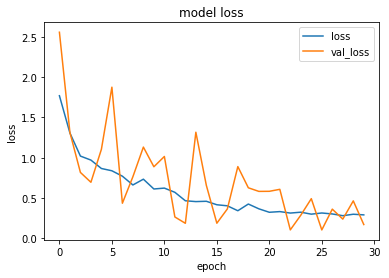

In [17]:
#overfit
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

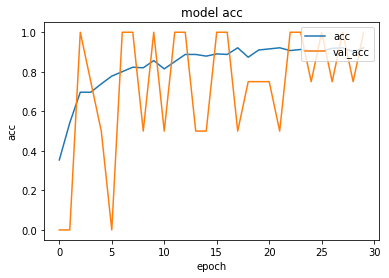

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper right')
plt.show()

In [59]:
#from keras.models import load_model
#model = load_model('test_good_curve_10.h5')

In [407]:
#利用此區檢查有無拼錯
#predict = model.predict(test)

In [19]:
scores = model.evaluate(test, test_label, verbose=1)
#scores = model.evaluate(train, train_label, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

90/90 [==============================] - 0s 373us/step
Test loss: 0.22921432322925991
Test accuracy: 0.9444444364971585


In [409]:
#print(predict[0:9]) 
#print(predict[10:19])
#print(predict[20:29])
#print(predict[30:39])
#print(predict[40:49])
#print(predict[50:59])

[[  7.53807370e-04   9.92265403e-01   9.97241586e-04   3.59688915e-04
    9.02718108e-04   3.07483715e-04   4.64696990e-04   1.82664255e-03
    2.12229835e-03]
 [  5.33831073e-04   9.98442352e-01   9.26848952e-05   8.30240606e-05
    2.08337660e-04   2.71319714e-05   1.41919969e-04   1.20603952e-04
    3.50191840e-04]
 [  5.07104695e-02   8.85630608e-01   1.15347877e-02   6.17670687e-03
    1.63069030e-03   4.57678270e-03   2.99040601e-03   1.36255445e-02
    2.31239833e-02]
 [  5.32707258e-04   9.98048306e-01   1.32752582e-04   2.49452947e-04
    3.05892434e-04   2.22769831e-05   2.07770601e-04   1.20786179e-04
    3.80188052e-04]
 [  4.31085285e-03   9.94117856e-01   1.51741333e-04   3.14267127e-05
    5.14710613e-04   2.60713314e-05   2.30489939e-04   7.77893511e-05
    5.38990658e-04]
 [  2.15664823e-02   2.26014666e-02   5.56200743e-01   8.57129619e-02
    5.08617843e-03   1.62873697e-02   4.93210815e-02   2.19067648e-01
    2.41560768e-02]
 [  1.18421169e-03   9.95389104e-01   5.